In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import kneighbors_graph
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [52]:
def fancy_dendrogram(*args, **kwargs):
    plt.figure(figsize=(10,10))
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [53]:
df=pd.read_csv('Data/iris.csv')

In [54]:
features=df.columns[:-1]

In [55]:
features

Index(['Sepal-length', 'Sepal-width', 'Petal-length', 'Petal-width'], dtype='object')

In [56]:
target=df.columns[-1]

In [57]:
target

'Species'

In [58]:
lab=set(df[target])

In [59]:
df.sample()

,Sepal-length,Sepal-width,Petal-length,Petal-width,Species
43,5.0,3.5,1.6,0.6,setosa


In [60]:
n_clusters=3

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le=LabelEncoder()

In [63]:
df[target]=le.fit_transform(df[target])

In [64]:
def calculateDistance(X,y,n_clusters=3):

    lis=[]
    # Plot the distances
    for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
        avg_dist = np.zeros((n_clusters, n_clusters))
        plt.figure(figsize=(5, 4.5))
        for i in range(n_clusters):
            for j in range(n_clusters):
                avg_dist[i, j] = pairwise_distances(X[y == i], X[y == j],
                                                    metric=metric).mean()
        avg_dist /= avg_dist.max()
        lis.append(avg_dist)
    return lis


In [65]:
class Cluster:
    def __init__(self):
        pass
    def __repr__(self):
        return '(%s,%s)' % (self.left, self.right)
    def add(self, clusters, grid, lefti, righti):
        self.left = clusters[lefti]
        self.right = clusters[righti]
        for r in grid:
            r[lefti] = min(r[lefti], r.pop(righti))
        grid[lefti] = list(map(min, list(zip(grid[lefti], grid.pop(righti)))))
        clusters.pop(righti)
        return (clusters, grid)

def agglomerate(labels, grid,linkage='min'):
    clusters = labels
    while len(clusters) > 1:
        print(clusters)
        distances = [(1, 0, grid[1][0])]
        for i,row in enumerate(grid[2:]):
            distances += [(i+2, j, c) for j,c in enumerate(row[:i+2])]
        j,i,_ = min(distances, key=lambda x:x[2])
        c = Cluster()
        clusters, grid = c.add(clusters, grid, i, j)
        clusters[i] = c
    return clusters.pop()

In [66]:
def agglomerativeClustering(X,y,n_clusters=3,labels = ('Type 1', 'Type 2', 'Type 3')):

    # Plot the distances
    for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
        avg_dist = np.zeros((n_clusters, n_clusters))
        plt.figure(figsize=(5, 4.5))
        for i in range(n_clusters):
            for j in range(n_clusters):
                avg_dist[i, j] = pairwise_distances(X[y == i], X[y == j],
                                                    metric=metric).mean()
        avg_dist /= avg_dist.max()
        for i in range(n_clusters):
            for j in range(n_clusters):
                plt.text(i, j, '%5.3f' % avg_dist[i, j],
                         verticalalignment='center',
                         horizontalalignment='center')

        plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2,
                   vmin=0)
        plt.xticks(range(n_clusters), labels, rotation=45)
        plt.yticks(range(n_clusters), labels)
        plt.colorbar()
        plt.suptitle("Interclass %s distances" % metric, size=18)
        plt.tight_layout()
    plt.show()

In [67]:
lis=calculateDistance(df[features],df[target])

In [68]:
list(lab)

['versicolor', 'setosa', 'virginica']

In [69]:
temp=["cosine", "euclidean", "cityblock"]

### For linkage = min

In [70]:
for lisIndex,i in enumerate(lis):
    print('--------For ',temp[lisIndex],'-------')
    agglomerate(list(lab),i.tolist())
    print('------End of ',temp[lisIndex],'-------')
    print()
    print()

--------For  cosine -------
['versicolor', 'setosa', 'virginica']
['versicolor', (setosa,virginica)]
------End of  cosine -------


--------For  euclidean -------
['versicolor', 'setosa', 'virginica']
['versicolor', (setosa,virginica)]
------End of  euclidean -------


--------For  cityblock -------
['versicolor', 'setosa', 'virginica']
['versicolor', (setosa,virginica)]
------End of  cityblock -------




### Even after using max as a linkage the dendogram does not changes

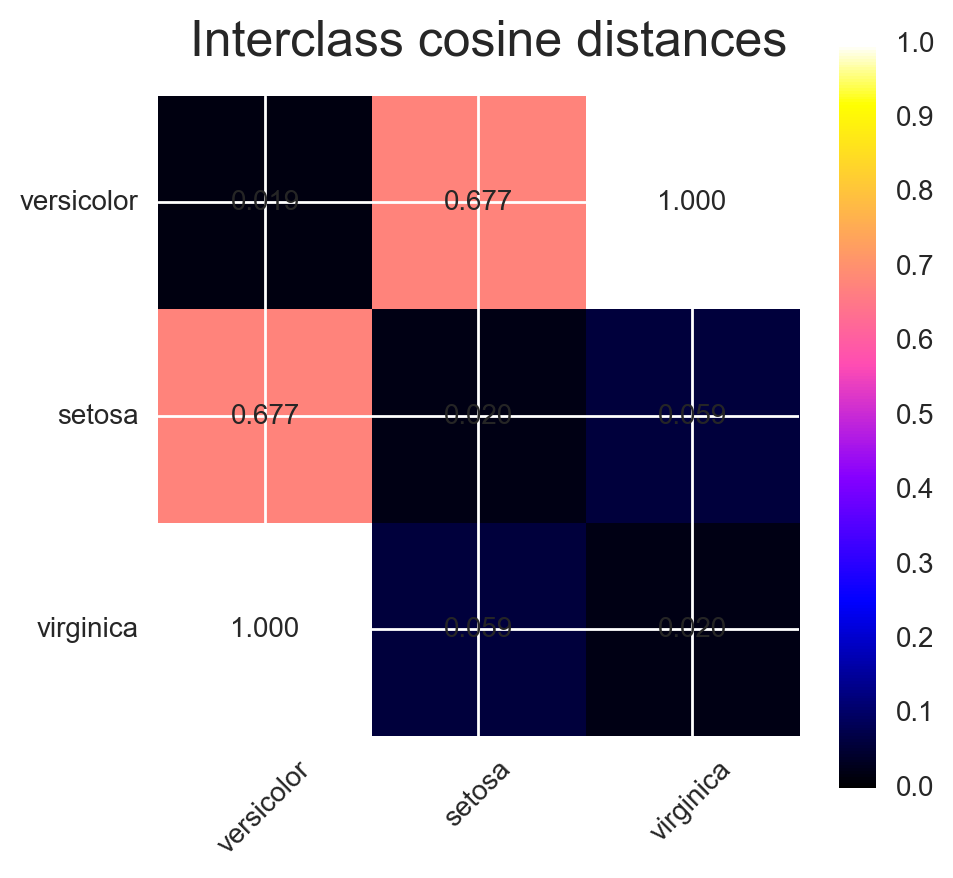

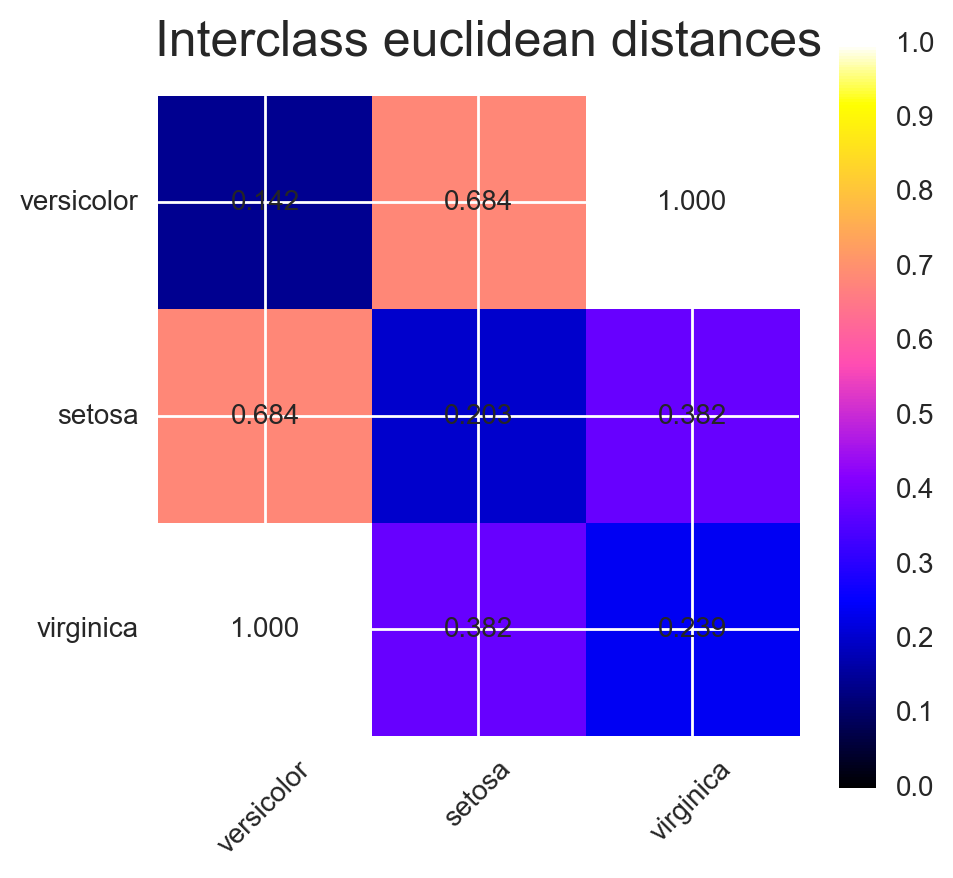

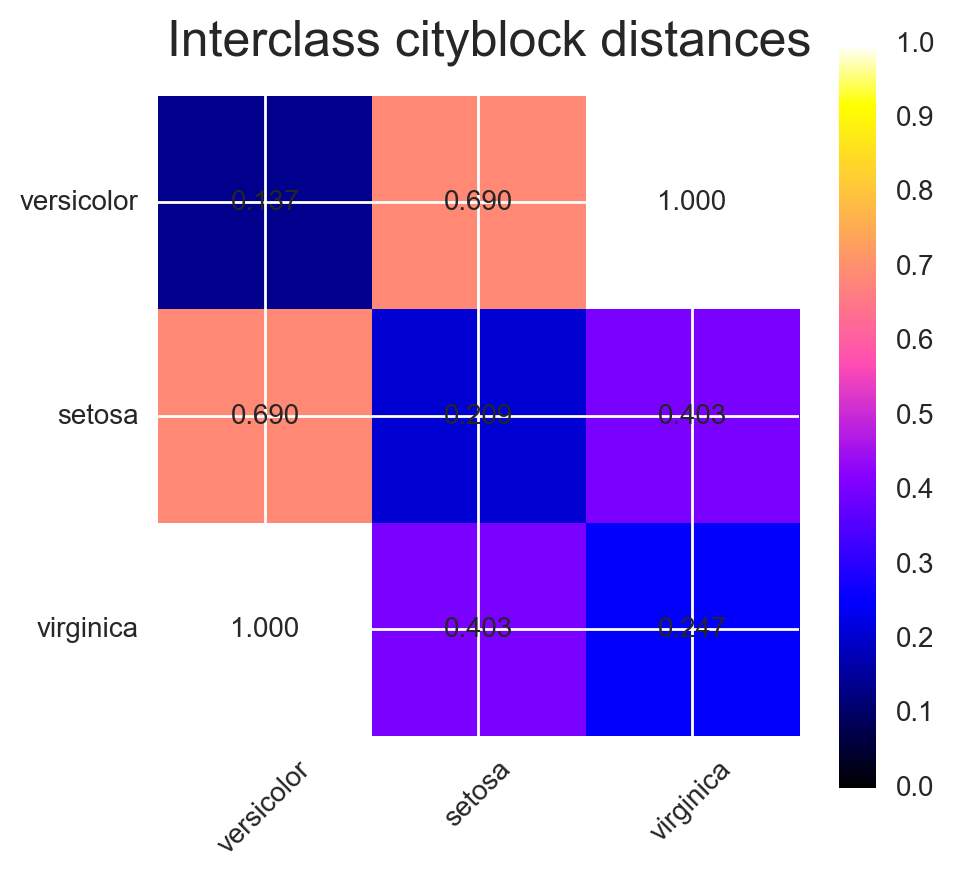

In [71]:
agglomerativeClustering(df[features],df[target],labels=lab)

In [72]:
W = linkage(df, 'ward')
C = linkage(df, 'complete')
A= linkage(df, 'average')

In [73]:
# from scipy.cluster.hierarchy import cophenet
# from scipy.spatial.distance import pdist

# c, coph_dists = cophenet(Z, pdist(df))
# c
# coph_dists

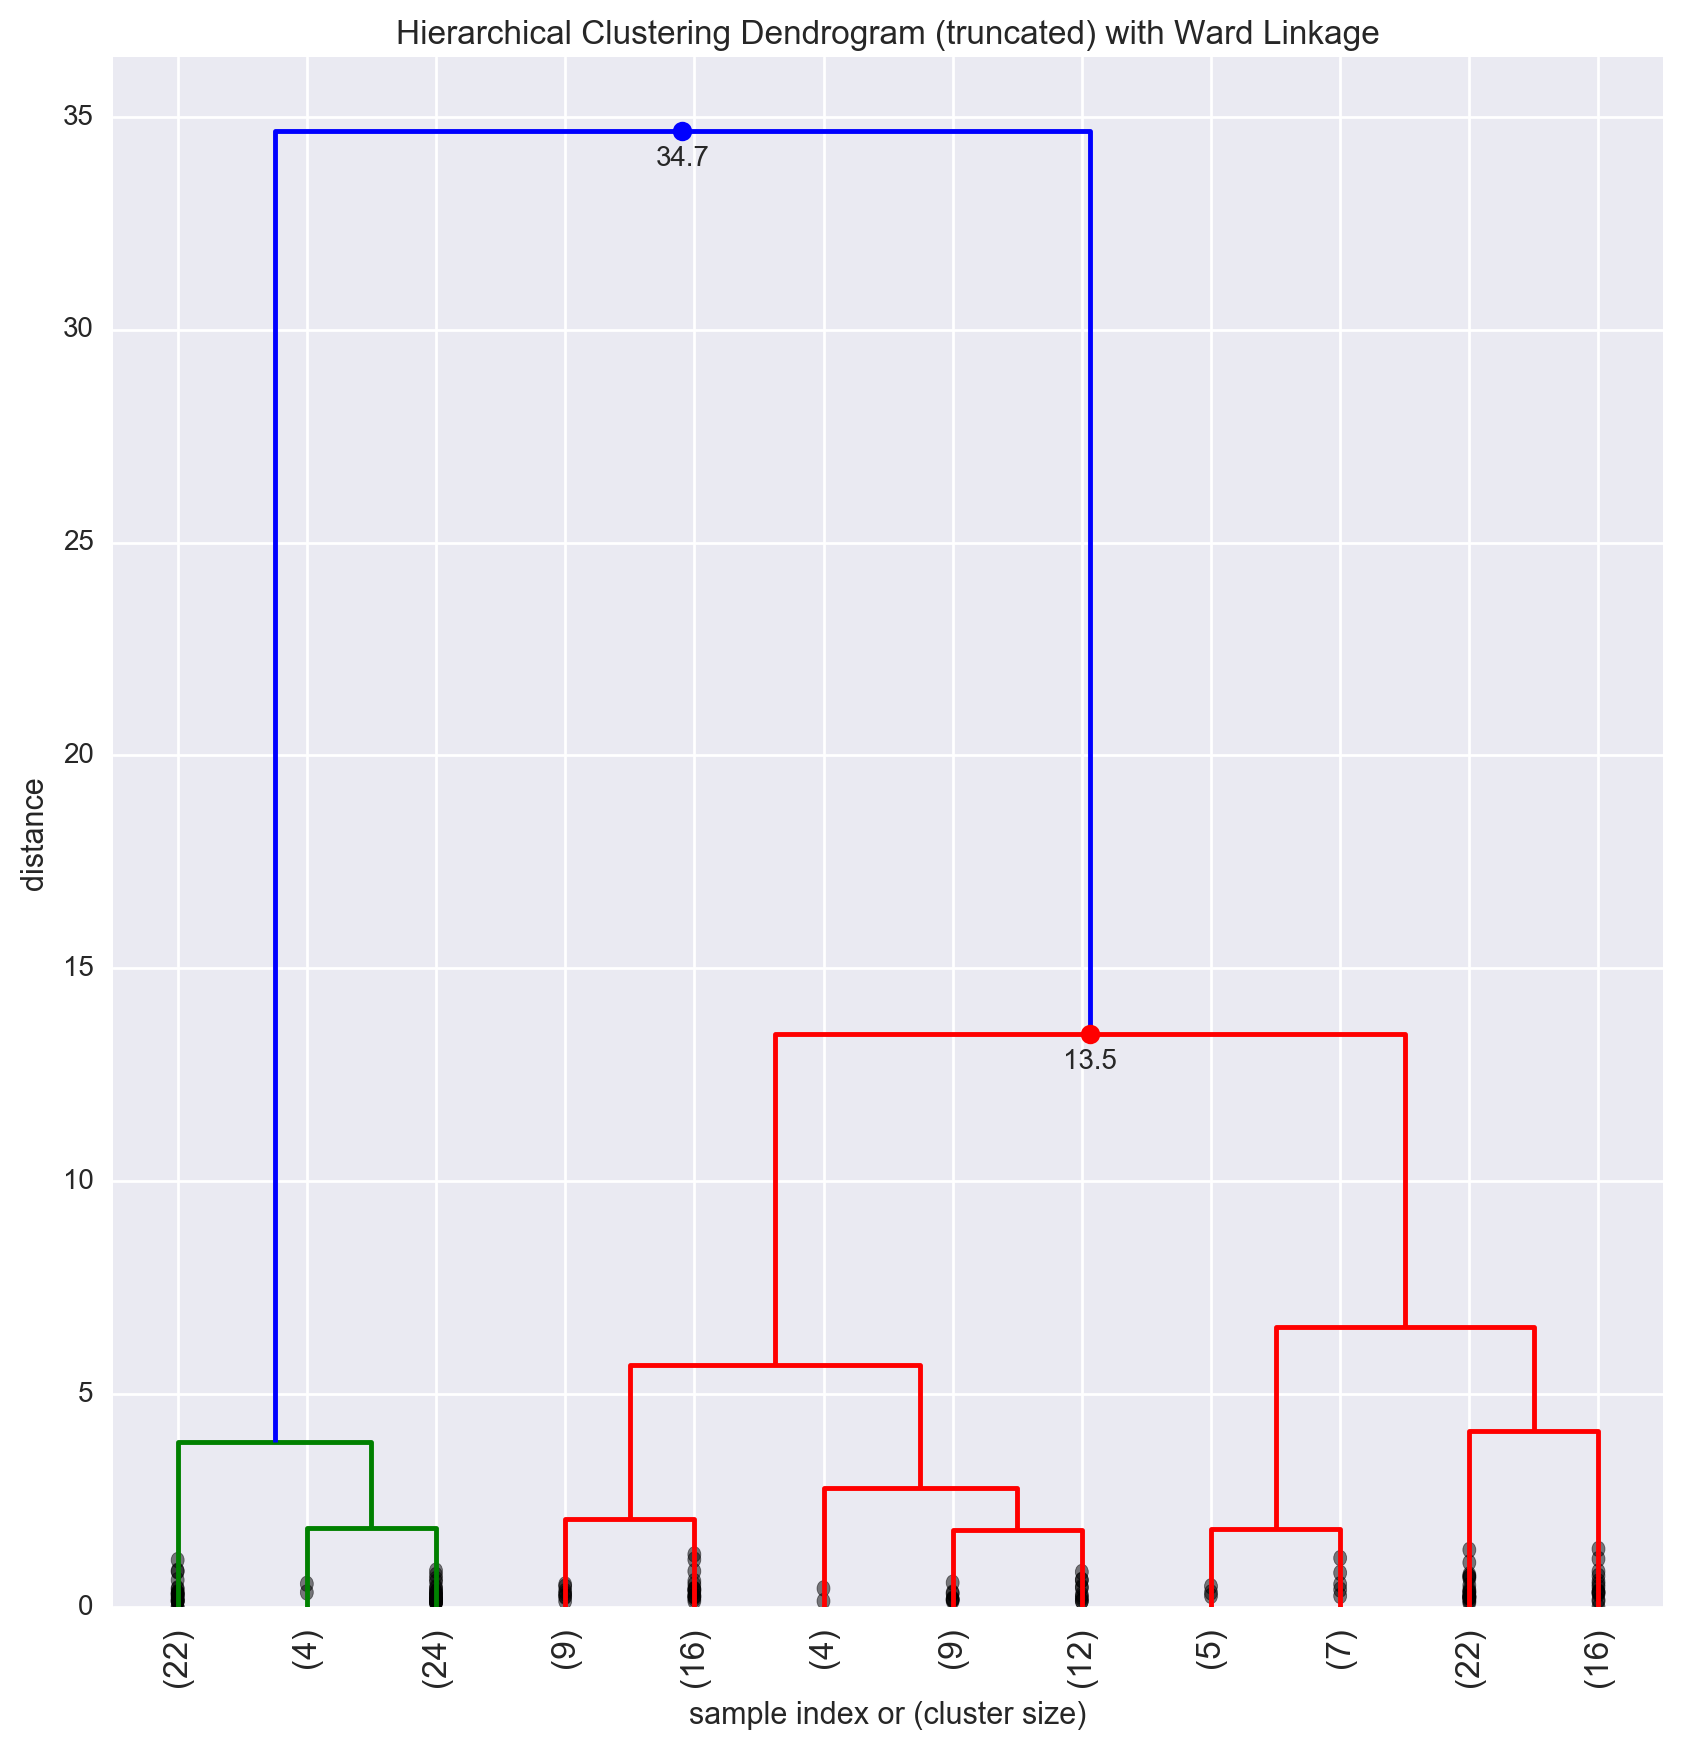

In [74]:
fancy_dendrogram(
    W,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.title('Hierarchical Clustering Dendrogram (truncated) with Ward Linkage')
plt.show()

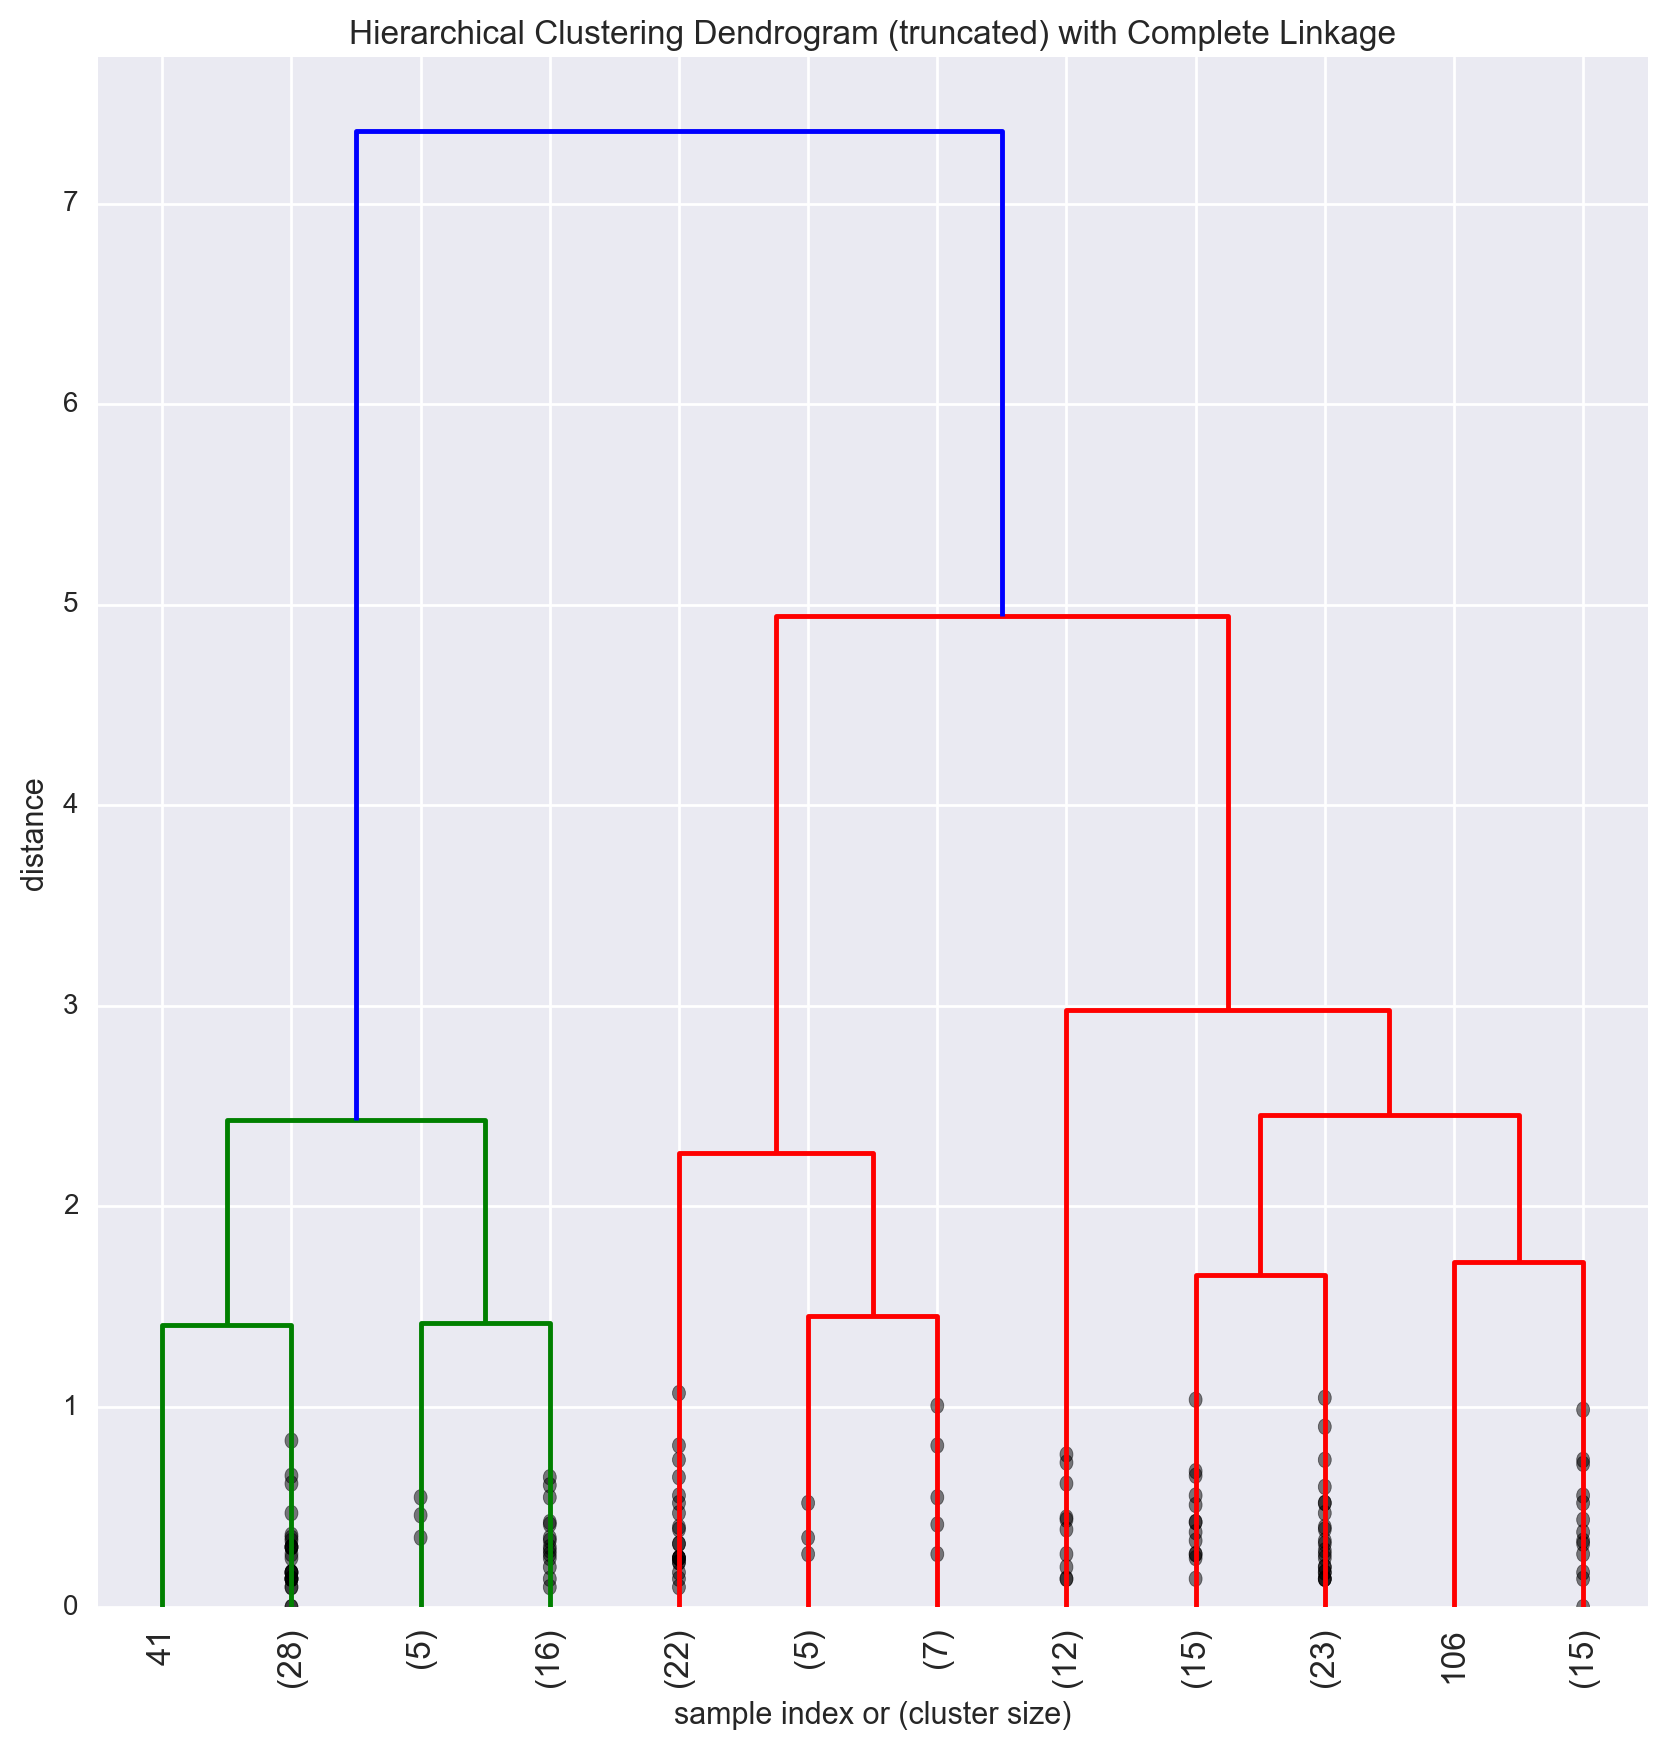

In [75]:
fancy_dendrogram(
    C,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    # useful in small plots so annotations don't overlap
)
plt.title('Hierarchical Clustering Dendrogram (truncated) with Complete Linkage')
plt.show()

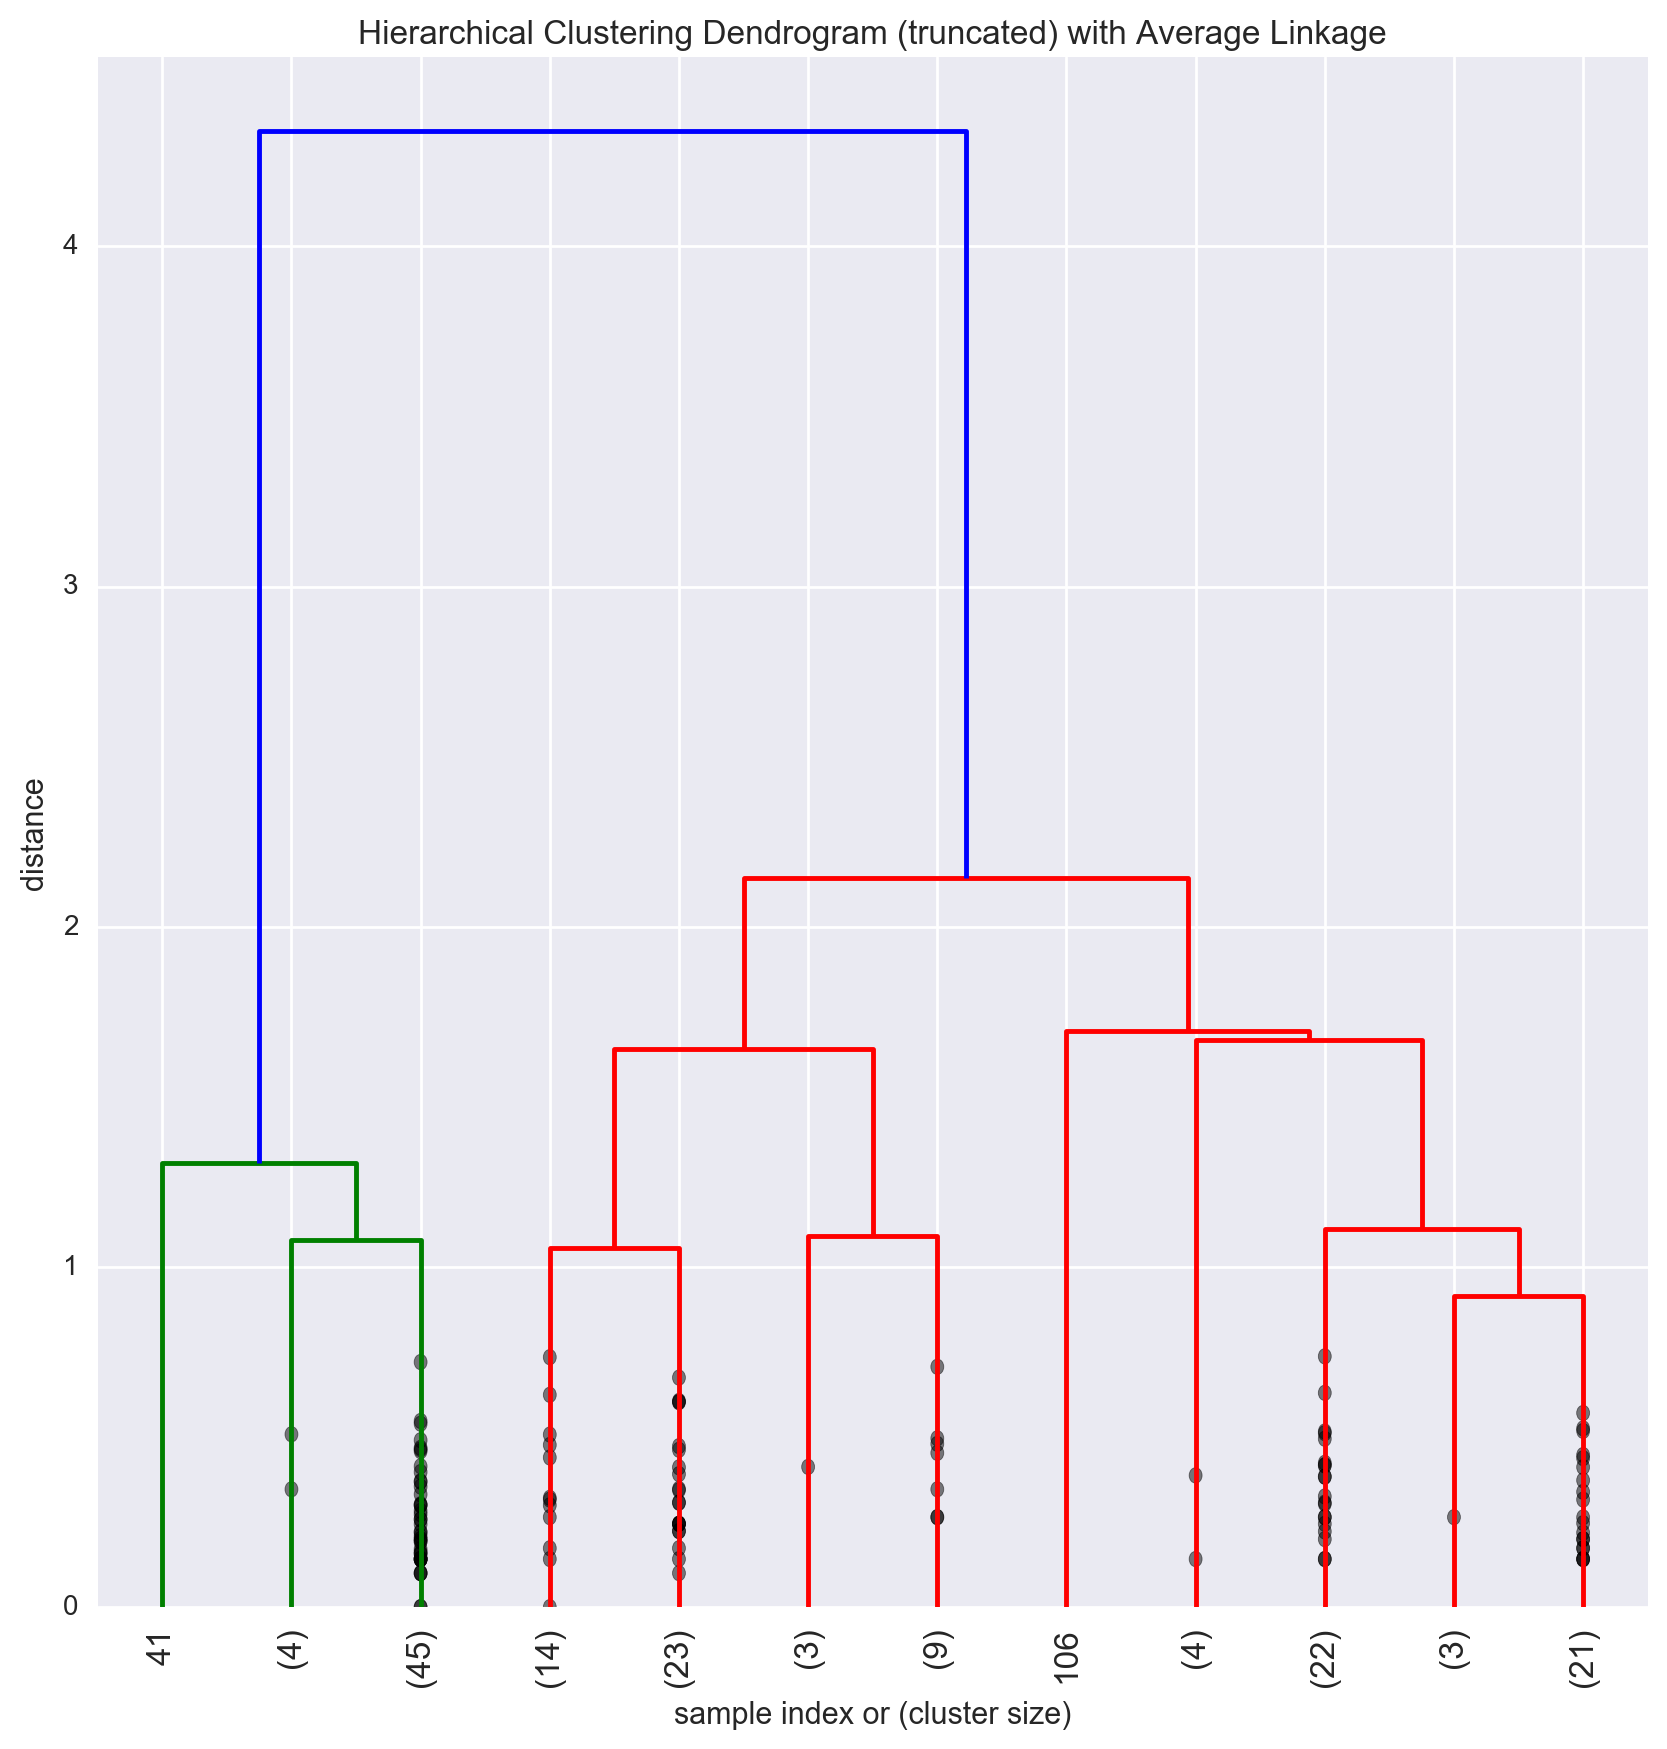

In [76]:
fancy_dendrogram(
    A,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.title('Hierarchical Clustering Dendrogram (truncated) with Average Linkage')
plt.show()

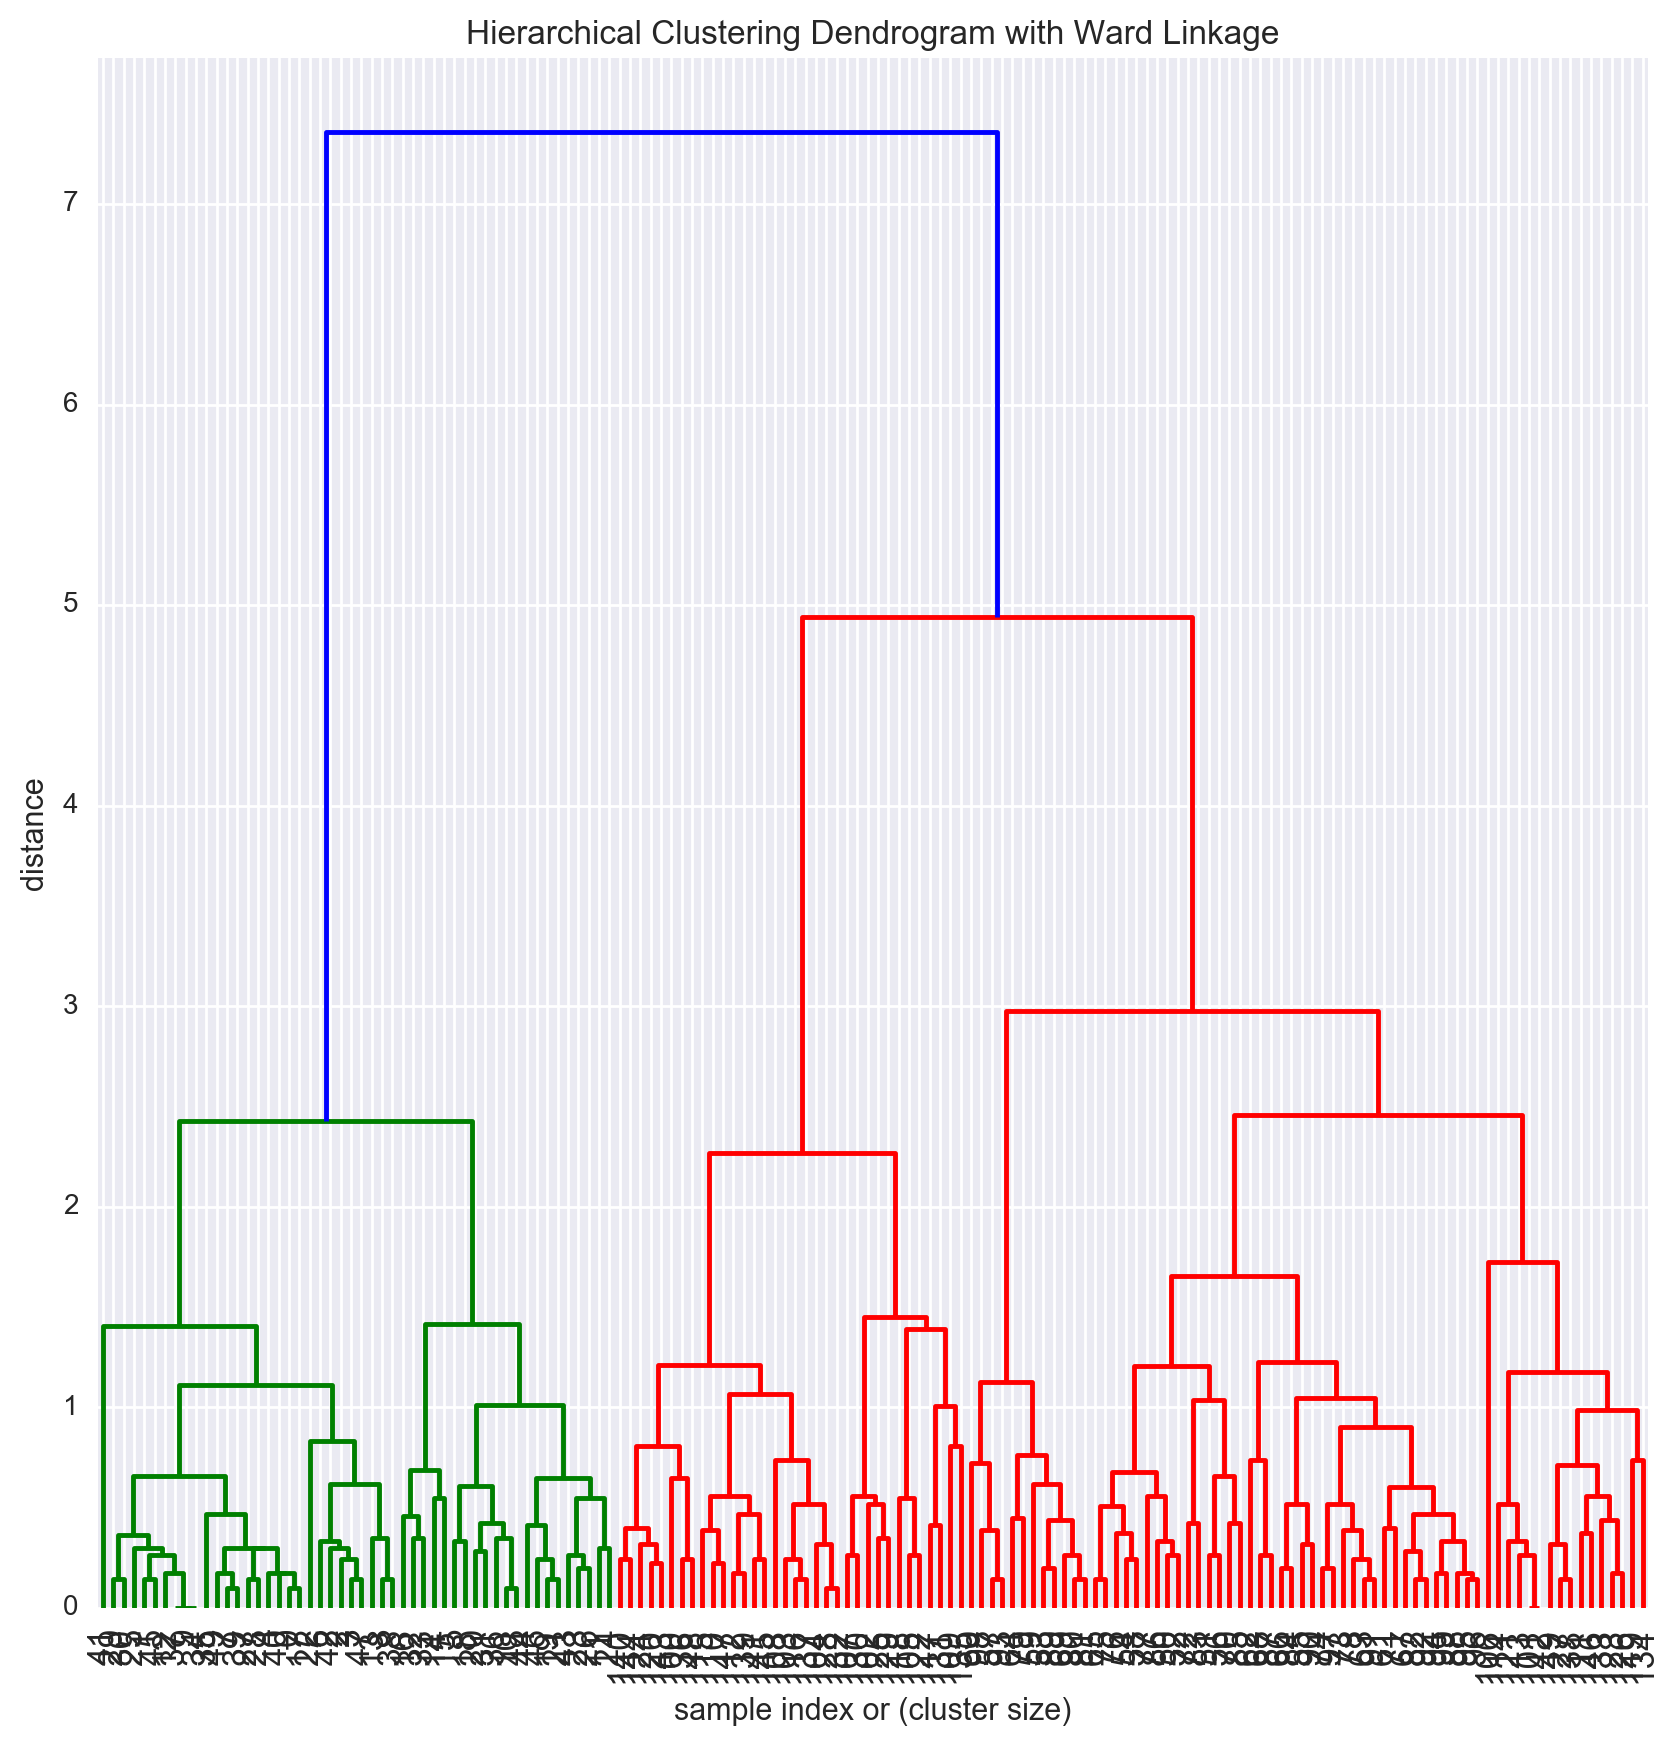

In [77]:
fancy_dendrogram(
    C,
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    # useful in small plots so annotations don't overlap
)
plt.title('Hierarchical Clustering Dendrogram with Ward Linkage')
plt.show()